<a href="https://colab.research.google.com/github/Kirans1ngh/Machine-Learning-practice/blob/main/Clustering/Customer_Segmentation_Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

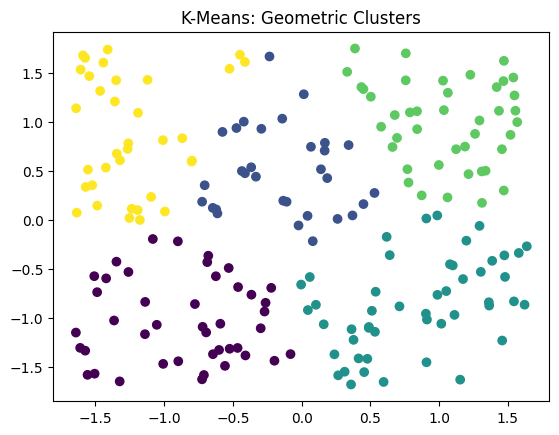

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# 1. Scale data (Required for distance-based clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# 2. Fit K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
km_labels = kmeans.fit_predict(X_scaled)

# 3. Plotting
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=km_labels, cmap='viridis')
plt.title("K-Means: Geometric Clusters")
plt.show()

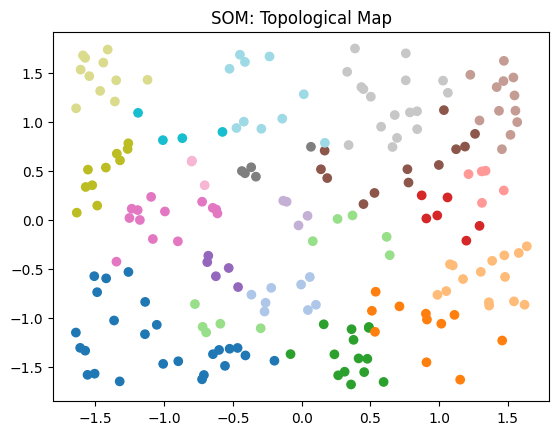

In [10]:
from minisom import MiniSom

# 1. Init: 5x5 grid for 2 input features
som = MiniSom(5, 5, 2, sigma=1.0, learning_rate=0.5)
som.train_random(X_scaled, 500)

# 2. Assign customers to grid coordinates
som_labels = [som.winner(x) for x in X_scaled]
# Flatten (x,y) coordinates to a single ID for visualization
ids = [x * 5 + y for x, y in som_labels]

# 3. Plotting
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=ids, cmap='tab20')
plt.title("SOM: Topological Map")
plt.show()

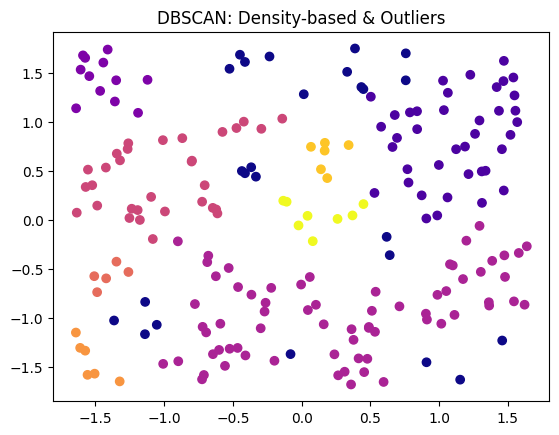

In [11]:
from sklearn.cluster import DBSCAN

# 1. Fit DBSCAN (Adjust eps based on data density)
db = DBSCAN(eps=0.3, min_samples=5).fit(X_scaled)

# 2. Plotting (Label -1 represents noise/outliers)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=db.labels_, cmap='plasma')
plt.title("DBSCAN: Density-based & Outliers")
plt.show()